In [851]:
%matplotlib inline
import simplejson
import sys
import requests 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep

with open('keys.json.nogit') as kf: 
    keys = simplejson.loads(kf.read()) 

mykey = keys['api_key']

url = 'https://api.fda.gov/drug/event.json?api_key='

def getdata(query,term):
    reqs = requests.get(url + mykey + query + term) 
    data = reqs.json()
    return data

def givedata(query, term, key):
    reqs = requests.get(url + mykey + query) 
    data = reqs.json()
    frame = pd.DataFrame(data[key])
    return frame


### what is the breakdown of reports by year from various sources?

In [852]:
years = list(str(yr) for yr in list(range(2004,2017)))
terms = {1 : 'Physician', 2 : 'Pharmacist',3 : 'Other',4 : 'Lawyer',5 : 'Consumer'}

reportsbyyr = pd.DataFrame()

for styear,eyear in zip(years[:-1],years[1:]):
    query = '&search=receivedate:[' + styear + '0101+TO+' + eyear + '0101]&count=primarysource.qualification'
    temp = getdata(query,'')
    temp = temp['results']
    dat = pd.DataFrame(temp)
    dat['year'] = styear
    dat['fraction'] = dat['count']/dat['count'].sum()
    dat['term'] = dat['term'].map(terms)
    reportsbyyr = frame.append(dat)
    
    sleep(1)

plot the raw data

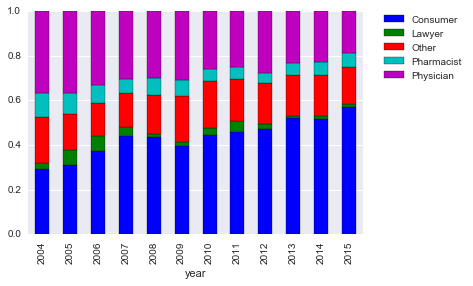

In [853]:
p1 = reportsbyyr.pivot_table('fraction',index='year',columns='term').plot(kind='bar',stacked=True).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
p1.sa

which year had the highest # of reports? 

In [ ]:
test = frame[frame['year'] == '2004'] #['fraction','count'] #for yr in years
test.index = test['term']
test = test[['year','fraction']]
t2 = test.unstack('year')

### What are the most common side effects reported, and how many drugs gave those side effects?

how many drugs out of the year were reported to have adverse effects?

In [ ]:
query = '&count=patient.reaction.reactionmeddrapt.exact'
sideeffects = pd.DataFrame(getdata(query,'')['results'])

sideeffects.iloc[:10]

###### are men or women more likely to report adverse effects?

In [ ]:
query_male = '&search=patient.patientsex:"1"'
query_female = '&search=patient.patientsex:"2"'

adverse_men = getdata(query_male,'')
adverse_women = getdata(query_female,'')

In [ ]:
adverse_men['meta']['results']['total']/adverse_women['meta']['results']['total']

In [ ]:
men_fract = adverse_men['meta']['results']['total']/(adverse_women['meta']['results']['total']+adverse_men['meta']['results']['total'])
women_fract = adverse_women['meta']['results']['total']/(adverse_women['meta']['results']['total']+adverse_men['meta']['results']['total'])

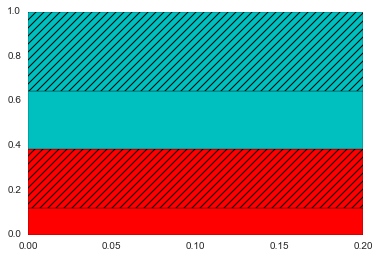

In [879]:
x = np.arange(1)
width = .2

Ma = men_fract - men_fract*s_m
Ms = men_fract*s_m
Wa = women_fract- women_fract*s_w
Ws = women_fract*s_w

p1 = plt.bar(x,Ma,width,color='r')
p2 = plt.bar(x,Ms,width,color='r',bottom=Ma,hatch='///')
p3 = plt.bar(x,Wa,width,color='c',bottom=Ma+Ms)
p4 = plt.bar(x,Ws,width,color='c',bottom=Ma+Ms+Wa,hatch='///')

xticks='none'

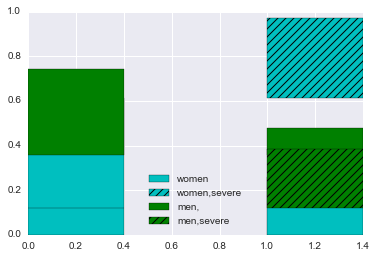

In [870]:
x = np.arange(2)
width = .4
Ma = (men_fract, men_fract - men_fract*s_m)
Ms = (0, men_fract*s_m)
Wa = (women_fract, women_fract - women_fract*s_w)
Ws = (0, women_fract*s_w)

p1 = plt.bar(x,Wa,width,color='c',  label='women')
p2 = plt.bar(x,Ws,width,color='c',bottom=Wa[0], hatch='///',  label='women,severe')
p3 = plt.bar(x,Ma,width,color='g', bottom=Ws[1], label='men,') 

# p1 = plt.bar(x,Ma,width,color='g', label='men,')
p4 = plt.bar(x,Ms,width,color='g',bottom=Ma[1] ,hatch='///', label='men,severe')

plt.legend(loc='best')

more women reported adverse effects than did men

which side effects were most common in women vs men? 

In [839]:
query_male = '&search=patient.patientsex:"1"&count=patient.reaction.reactionmeddrapt.exact'
query_female = '&search=patient.patientsex:"2"&count=patient.reaction.reactionmeddrapt.exact'

effects_men = pd.DataFrame(getdata(query_male,'')['results'])
effects_women = pd.DataFrame(getdata(query_female,'')['results'])


In [840]:
mset = (set(effects_men[:25]['term']) - set(effects_women[:25]['term']))
mtot = effects_men[:25]['count'].sum()

wset = (set(effects_women[:25]['term']) - set(effects_men[:25]['term']))
wtot = effects_women[:25]['count'].sum()

In [841]:
w25 = effects_women[:25]
m25 = effects_men[:25]

In [842]:
we = pd.DataFrame()
for term in wset:
    we = we.append(w25[w25['term']==term])
    
we['count'] = 100*we['count']/wtot
    
me = pd.DataFrame()
for term in mset:
    me = me.append(m25[m25['term']==term])
    
me['count'] = 100*me['count']/mtot

In [845]:
we.index=we['term']
me.index=me['term']

we.to_csv('women_effects.csv')
me.to_csv('men_effects.csv')


down vote
accepted
	

Use the Figure.savefig() method, like so:

ax = s.hist()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('/path/to/figure.pdf')

fig, axs = plt.subplots(1,2)

df['korisnika'].plot(ax=axs[0])
df['osiguranika'].plot(ax=axs[1])

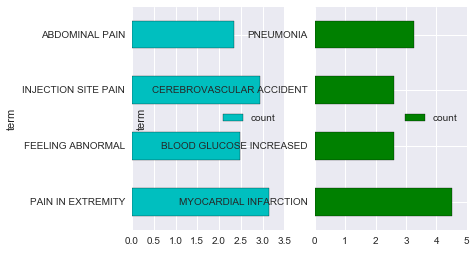

In [881]:
fig, axs = plt.subplots(1,2)

p1 = we.plot(ax=axs[0],kind='barh',color='c',label='women')
p2 = me.plot(ax=axs[1],kind='barh',color='g',label='men')

fig = p1.get_figure()
fig = p2.get_figure()
# ax1 = fig.add_subplot(1,1,1)
# ax1 = fig.add_subplot(1,1,1)

# ax1.plot(p1)
# ax1.plot(p2)

fig.savefig('test.png', bbox_inches='tight')

TypeError: Empty 'DataFrame': no numeric data to plot

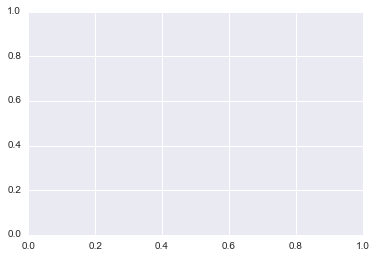

In [876]:
plt.figure()

with pd.plot_params.use('x_compat', True):
    test.sex.plot(kind='barh',color='c',label='women')
#     test.men.plot(kind='barh',color='g',label='men')

In [874]:
we['sex']='women'
me['sex']='men'

test = pd.concat([we,me])
test

,count,term,sex
term,,,
PAIN IN EXTREMITY,3.157833,PAIN IN EXTREMITY,women
FEELING ABNORMAL,2.485279,FEELING ABNORMAL,women
INJECTION SITE PAIN,2.950783,INJECTION SITE PAIN,women
ABDOMINAL PAIN,2.349492,ABDOMINAL PAIN,women
MYOCARDIAL INFARCTION,4.512573,MYOCARDIAL INFARCTION,men
BLOOD GLUCOSE INCREASED,2.594437,BLOOD GLUCOSE INCREASED,men
CEREBROVASCULAR ACCIDENT,2.621783,CEREBROVASCULAR ACCIDENT,men
PNEUMONIA,3.252291,PNEUMONIA,men


In [838]:
p1 = test.groupby('sex').plot(kind='bar',stacked=True,color='c',label='women')
# p2 = me.plot(kind='barh',color='g',label='men')

KeyError: 'sex'

###### are the reported side effects more severe for men or women?

In [ ]:
query_male = '&search=patient.patientsex:"1"+AND+serious:"1"'
query_female = '&search=patient.patientsex:"2"+AND+serious:"1"'

sev_men = getdata(query_male,'')
sev_women = getdata(query_female,'')

In [ ]:
s_m = (sev_men['meta']['results']['total']/adverse_men['meta']['results']['total'])
s_w = (sev_women['meta']['results']['total']/adverse_women['meta']['results']['total'])

69% of men report serious side effects, vs 58% of women

_women have more adverse reactions, but men tend to have more serious reactions_

In [ ]:
query_male = '&search=patient.patientsex:"1"+AND+patient.reaction.reactionmeddrapt:"drug+ineffective"'
query_female = '&search=patient.patientsex:"2"+AND+patient.reaction.reactionmeddrapt:"drug+ineffective"'

no_men = getdata(query_male,'')
no_women = getdata(query_female,'')

In [ ]:
(no_men['meta']['results']['total']/adverse_men['meta']['results']['total'])/(no_women['meta']['results']['total']/adverse_women['meta']['results']['total'])

In [ ]:
query = '&search=patient.reaction.reactionmeddrapt:"drug+ineffective"&count=patient.drug.medicinalproduct.exact&limit=1000'
drugswitheffect = pd.DataFrame(getdata(query,'')['results'])

drugswitheffect

In [ ]:
# query = '&search=patient.drug.openfda.generic_name:"imatinib"&count=patient.drug'
query =  '&search=patient.drug.drugindication:"tumour"&count=patient.reaction.reactionmeddrapt.exact'
# getdata(query,'')
imat = pd.DataFrame(getdata(query,'')['results'])

In [ ]:
imat

Do overweight cancer patients have different adverse effects? 

In [ ]:
# query = '&search=patient.drug.openfda.pharm_class_cs:(patient.drug.openfda.pharm_class_cs())
query_heavy = '&search=patient.drug.drugindication:"tumour"+AND+patient.patientweight:[60+TO+300]&count=patient.reaction.reactionmeddrapt.exact'
query_light = '&search=patient.drug.drugindication:"tumour"+AND+patient.patientweight:[0+TO+60]&count=patient.reaction.reactionmeddrapt.exact'

heavy = pd.DataFrame(getdata(query_heavy,'')['results'])
light = pd.DataFrame(getdata(query_light,'')['results'])


In [ ]:
h = set(heavy[:20]['term'])
l = set(light[:20]['term'])

h^l



In [ ]:
heavy[:20]

In [ ]:
light[:20]

are male or female patients more likely to have adverse effects?

In [ ]:
query_male = '&search=patient.drug.drugindication:"tumour"+AND+patient.patientsex:"1"&count=patient.reaction.reactionmeddrapt.exact'
query_female = '&search=patient.drug.drugindication:"tumour"+AND+patient.patientsex:"2"&count=patient.reaction.reactionmeddrapt.exact'

male = pd.DataFrame(getdata(query_male,'')['results'])
female = pd.DataFrame(getdata(query_female,'')['results'])


In [ ]:
set(male[:10]['term']) ^ set(female[:10]['term'])

In [ ]:
male[:10]

In [ ]:
female[:10].sum(), male[:10].sum()

In [ ]:
fm['count'] = female['count']/female['count'].sum()
m['count'] = male['count']/male['count'].sum()

In [ ]:
comp = fm
comp['count'] = comp['count']/m['count']
comp[:20].plot(kind='bar')

In [ ]:
query_male = '&search=patient.reaction.reactionmeddrapt:"nausea"+AND+patient.patientsex:"1"&count=patient.reaction.reactionmeddrapt.exact'
query_female = '&search=patient.reaction.reactionmeddrapt:"nausea"+AND+patient.patientsex:"2"&count=patient.reaction.reactionmeddrapt.exact'

male = pd.DataFrame(getdata(query_male,'')['results'])
female = pd.DataFrame(getdata(query_female,'')['results'])
